<a href="https://colab.research.google.com/github/chamodajayamini/ImageClassifier/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

In [33]:
(X_train, Y_train), (X_test, Y_test) =  datasets.cifar10.load_data()

In [34]:
X_test.shape

(10000, 32, 32, 3)

In [35]:
X_train.shape

(50000, 32, 32, 3)

In [36]:
Y_train.shape

(50000, 1)

In [37]:
Y_test.shape

(10000, 1)

In [38]:
Y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [39]:
#convert 2D array into the 1D Array

In [40]:
Y_train = Y_train.reshape(-1,)
Y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [41]:
Y_test = Y_test.reshape(-1,)

In [42]:
Y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [43]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog','frog','horse','ship','truck']

In [44]:
def plot_sample(X,Y, index):
  plt.figure(figsize=(15, 2))
  plt.imshow(X[index])
  plt.xlabel(classes [Y[index]])


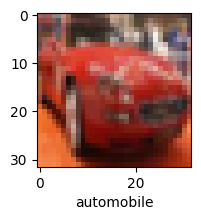

In [45]:
plot_sample(X_train, Y_train, 5)

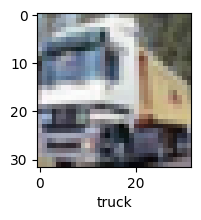

In [46]:
plot_sample(X_train, Y_train, 1)

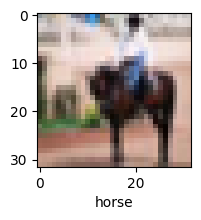

In [47]:
plot_sample(X_train, Y_train,11)

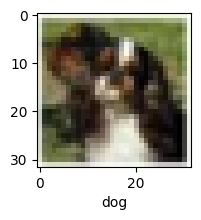

In [48]:
plot_sample(X_train, Y_train, 500)

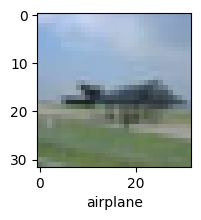

In [49]:
plot_sample(X_train, Y_train, 600)

In [50]:
X_train = X_train/255.0
X_test = X_test/255.0

In [51]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

ann.compile(optimizer='SGD' ,
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
ann.fit(X_train, Y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 173s 110ms/step - loss: 1.8133 - accuracy: 0.3535
Epoch 2/5
1563/1563 [==============================] - 164s 105ms/step - loss: 1.6254 - accuracy: 0.4255
Epoch 3/5
1563/1563 [==============================] - 153s 98ms/step - loss: 1.5420 - accuracy: 0.4566
Epoch 4/5
1563/1563 [==============================] - 163s 104ms/step - loss: 1.4861 - accuracy: 0.4765
Epoch 5/5
1563/1563 [==============================] - 150s 96ms/step - loss: 1.4346 - accuracy: 0.4948


In [52]:
from sklearn.metrics import confusion_matrix, classification_report

In [53]:
import numpy as np
Y_pred = ann.predict(X_test)
Y_pred_classes = [np.argmax (element) for element in Y_pred ]
print('Classification report: \n' , classification_report(Y_test, Y_pred_classes ))


313/313 [==============================] - 10s 30ms/step
Classification report: 
               precision    recall  f1-score   support

           0       0.60      0.52      0.56      1000
           1       0.67      0.43      0.53      1000
           2       0.38      0.37      0.37      1000
           3       0.37      0.33      0.35      1000
           4       0.41      0.47      0.44      1000
           5       0.45      0.30      0.36      1000
           6       0.57      0.49      0.53      1000
           7       0.52      0.58      0.55      1000
           8       0.61      0.66      0.63      1000
           9       0.42      0.73      0.54      1000

    accuracy                           0.49     10000
   macro avg       0.50      0.49      0.49     10000
weighted avg       0.50      0.49      0.49     10000



In [54]:
import seaborn as sns

In [55]:
plt.figure(figsize=(14,7))

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<function matplotlib.pyplot.show(close=None, block=None)>

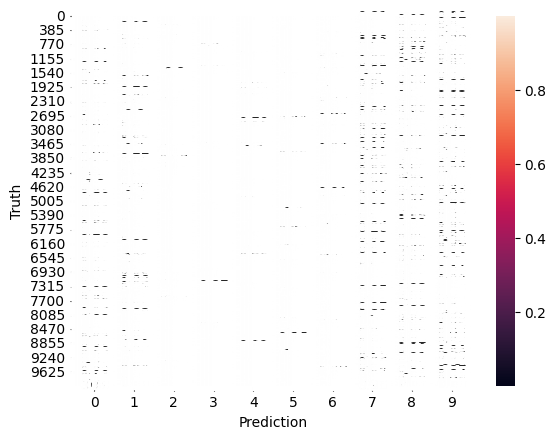

In [56]:
sns.heatmap(Y_pred, annot = True)
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.show

In [ ]:
cnn= models.Sequential([
    layers.Conv2D (filters= 32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D ((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')

])

In [ ]:
cnn.compile(optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [ ]:
cnn.fit(X_train,  Y_train,  epochs=10)

In [ ]:
cnn.evaluate(X_test, Y_test)

In [ ]:
Y_pred = cnn.predict(X_test)
Y_pred[:5]

In [ ]:
Y_classes = [np.argmax(element) foe element in Y_pred]
Y_classes[:5]


In [ ]:
Y_test[:5]

In [ ]:
plot_sample(X_test,Y_test,60)

In [ ]:
plot_sample(X_test,Y_test,100)

In [ ]:
classes[Y_classes[4]]